In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [82]:
insurance = pd.read_csv(r'C:\Users\user\Downloads\cargoflash\knn\insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [83]:
insurance.shape

(1338, 7)

In [84]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [85]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [87]:
insurance.describe(percentiles = [.01,.05,.10,.25,.5,.75,.80,.90,.95,.99])

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
1%,18.000000,17.895150,0.000000,1252.972730
5%,18.000000,21.256000,0.000000,1757.753400
10%,19.000000,22.990000,0.000000,2346.533615
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515


(1329, 7)

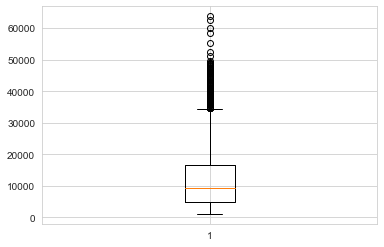

In [88]:
plt.boxplot(insurance['charges'])
Q1 = insurance['charges'].quantile(0.0)
Q3 = insurance['charges'].quantile(0.8)
IQR = Q3 - Q1
insurance = insurance[(insurance['charges'] <= Q3 + 1.5*IQR)]
insurance.shape

In [90]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
insurance["sex"] = le.fit_transform(insurance["sex"])  #female =0 , male =1
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [91]:
insurance["smoker"] = le.fit_transform(insurance["smoker"]) 
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [92]:
insurance = insurance.drop("region",axis=1)

In [93]:
insurance.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [94]:
# charges values are big so to minimize it we will convert it in K(per 1000)
insurance["charges"] = insurance["charges"]/1000
insurance.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16.884924
1,18,1,33.770,1,0,1.725552
2,28,1,33.000,3,0,4.449462
3,33,1,22.705,0,0,21.984471
4,32,1,28.880,0,0,3.866855


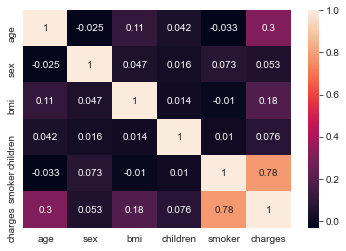

In [95]:
sns.heatmap(insurance.corr(), annot=True)
plt.show()

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = insurance.drop('charges',axis=1)

y = insurance['charges']

num_vars = x.columns

num_vars = list(num_vars)

x[num_vars] = scaler.fit_transform(x[num_vars])

x.head(10)

,age,sex,bmi,children,smoker
0,-1.435709,-1.008311,-0.447296,-0.908878,2.003770
1,-1.506953,0.991757,0.517885,-0.079847,-0.499059
2,-0.794513,0.991757,0.391277,1.578217,-0.499059
3,-0.438293,0.991757,-1.301490,-0.908878,-0.499059
4,-0.509537,0.991757,-0.286159,-0.908878,-0.499059
5,-0.580781,-1.008311,-0.802457,-0.908878,-0.499059
6,0.487879,-1.008311,0.463624,-0.079847,-0.499059
7,-0.153317,-1.008311,-0.473605,1.578217,-0.499059
8,-0.153317,0.991757,-0.129954,0.749185,-0.499059
9,1.485296,-1.008311,-0.786014,-0.908878,-0.499059


In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [99]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [106]:
# creating list of K for KNN
k_list = list(range(1,50))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='r2')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

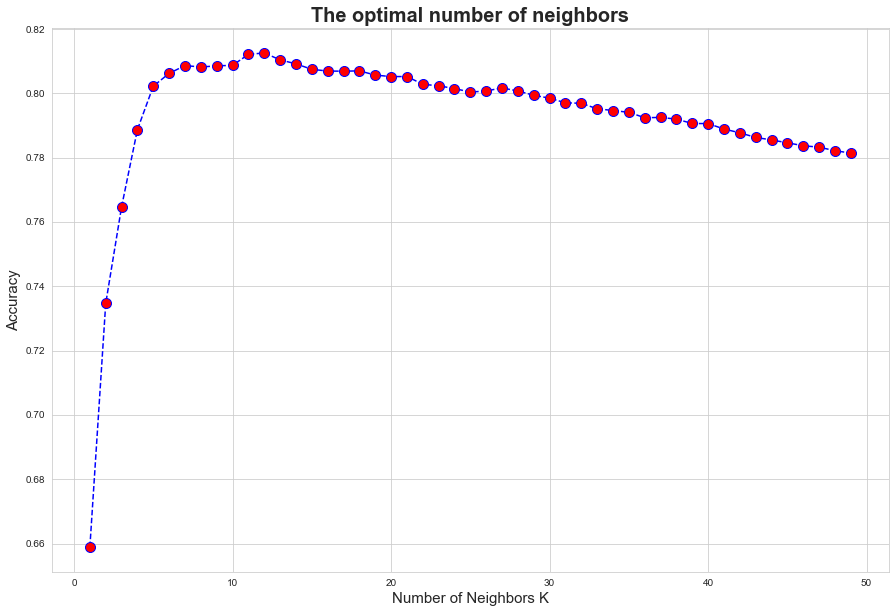

In [107]:
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, cv_scores,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.show()

In [108]:
k_max = cv_scores.index(max(cv_scores))+1
print( "At K = {}, Max Accuracy = {}".format(k_max, max(cv_scores)*100))

At K = 12, Max Accuracy = 81.25729676076028
